# StockX Sneaker Sales
_Author: Zeth De Luna &mdash; October 14, 2020_

I'm a little late to the game, but in my quest to find an interesting dataset to analyze I stumbled upon an old data contest presented by [StockX](https://stockx.com/how-it-works), a popular website that allows its users to buy or sell items (most commonly&mdash;but not limited to&mdash;shoes, clothing, and accessories) at their current "market value". I mostly browse the website for high-end and rare sneakers, which is why I got excited when I found that the data that StockX provided for their contest is focused on sneaker sales. 

Here's a brief intro to the [contest details](https://stockx.com/news/the-2019-data-contest/) from the StockX website:

"Since the very beginning of StockX, data and transparency have been at the very core of our business. It’s in our DNA. Remember when those Jurassic Park scientists drilled into an amber-encased mosquito, extracted the genetic material of some long-dead dinosaur, and created an amoral army of prehistoric killing machines? Well, if scientists ever did that to StockX, data and transparency is what they’d find. Those two ideas are fundamental to our business and our brand, and have been that way since back when we were Campless. They underlie everything we do – from the symbols on our stock ticker to the charts on our product pages. And now, we want you to join the fun. Enter the 2019 StockX Data Contest.

The first time we launched this contest was way back in 2017, and we’re excited to bring it back. The basic idea is this: we give you a bunch of original StockX sneaker data, then you crunch the numbers and come up with the coolest, smartest, most compelling story you can tell. It can be literally anything you want. A theory, an insight, even just a really original data visualization. It could be a novel hypothesis about resale prices you’ve always wanted to test. Or maybe it’s just a beautiful chart to visualize the data. It can be on any subject – sneakers, brands, buyers, or even StockX itself. Whatever you find interesting, just follow your bliss."

In this project, I hope to answer the following questions:
* Are customers in certain regions more likely to spend more on sneakers?
* Is there a higher chance of making money re-selling larger shoe sizes or smaller shoe sizes?
* What is the average ROI on re-selling Yeezy shoes vs. Off-White x Nike?
* Do these sneakers sell more during a certain time of the year?
* Are Yeezy and Off-White sales increasing or decreasing?

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import seaborn as sns

purple = (85/255, 37/255, 130/255)
gold = (253/255, 185/255, 39/255)
gray = (67/255, 67/255, 67/255)
mpls = (117/255, 157/255, 210/255)

lakers = [purple, gold, gray, mpls]

%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Reading the Data

In [2]:
sneakers = pd.read_csv('StockX_Data_Contest_2019.csv')

In [3]:
sneakers.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


In [4]:
sneakers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  object 
 4   Retail Price  99956 non-null  object 
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


## Data Cleaning
The data would be more easily explored if:
* the `Order Date` and `Release Date` columns were in a datetime format
* the `Sale Price` and `Retail Price` columns were transformed to a numerical type
* the `Sneaker Name` column was less hectic

### `Order Date` and `Release Date`
In its current format, the dates are stored as strings following a \[month/day/year\] order. 

In [5]:
# transform date columns to datetime dtype
for column in ['Order Date', 'Release Date']:
    sneakers[column] = pd.to_datetime(sneakers[column], format='%m/%d/%y')

In [6]:
sneakers.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2017-02-11,11.0,Rhode Island


### `Sale Price` and `Retail Price`
After removing dollar signs and commas from these values, they can be converted to `int`.

In [7]:
# convert price columns to int
for column in ['Sale Price', 'Retail Price']:
    sneakers[column] = (sneakers[column]
                            .str.replace('\$|,', '') # remove dollar signs and commas
                            .astype(int) # convert to int dtype
                       )

In [8]:
sneakers.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island


### `Sneaker Name`

In [9]:
sneakers['Brand'].value_counts()

 Yeezy       72162
Off-White    27794
Name: Brand, dtype: int64

In [10]:
# view some Off-White sales
sneakers[sneakers['Brand'] == 'Off-White'].head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
128,2017-09-07,Off-White,Nike-Air-Max-90-Off-White,1600,160,2017-09-09,8.0,California
129,2017-09-07,Off-White,Nike-Air-Max-90-Off-White,1090,160,2017-09-09,11.5,New York
130,2017-09-07,Off-White,Nike-Air-Presto-Off-White,1344,160,2017-09-09,10.0,New York
131,2017-09-07,Off-White,Nike-Air-Presto-Off-White,1325,160,2017-09-09,10.0,Massachusetts
132,2017-09-07,Off-White,Nike-Air-VaporMax-Off-White,1800,250,2017-09-09,12.0,Kentucky


On the [contest website](https://stockx.com/news/the-2019-data-contest/), it is stated that the data only contains sales data on either "Yeezy" or "Off-White x Nike" shoes. Since there is already a `Brand` column, the brands can be removed from the names in the `Sneaker Name` column.

In [11]:
# remove brand names from sneaker names
brands = 'Nike-|-Off-White|[Aa]didas-'
sneakers['Sneaker Name'] = sneakers['Sneaker Name'].str.replace(brands, '')

# remove whitespaces from 'Brand' column
sneakers['Brand'] = sneakers['Brand'].str.strip()

### Return on Investments Column
One of the questions asked in the intro has to do with the return on investmets (ROI) for re-selling sneakers. This information can be found by simply finding the difference between the `Sale Price` and the `Retail Price`, which will be stored in a new column called `ROI`. (It will be assumed that the seller obtained the shoes at retail price.)

In [12]:
# calculate ROI for each sale and assign to a new column
sneakers['ROI'] = sneakers['Sale Price'] - sneakers['Retail Price']

In [13]:
sneakers.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,ROI
0,2017-09-01,Yeezy,Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,877
1,2017-09-01,Yeezy,Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,465
2,2017-09-01,Yeezy,Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,470
3,2017-09-01,Yeezy,Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,855
4,2017-09-01,Yeezy,Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,608


Another interesting thing that the ROI tells us is how much more money over the retail price StockX users are willing to pay for shoes.

## Analysis

### Are customers in certain regions more likely to spend more on sneakers?

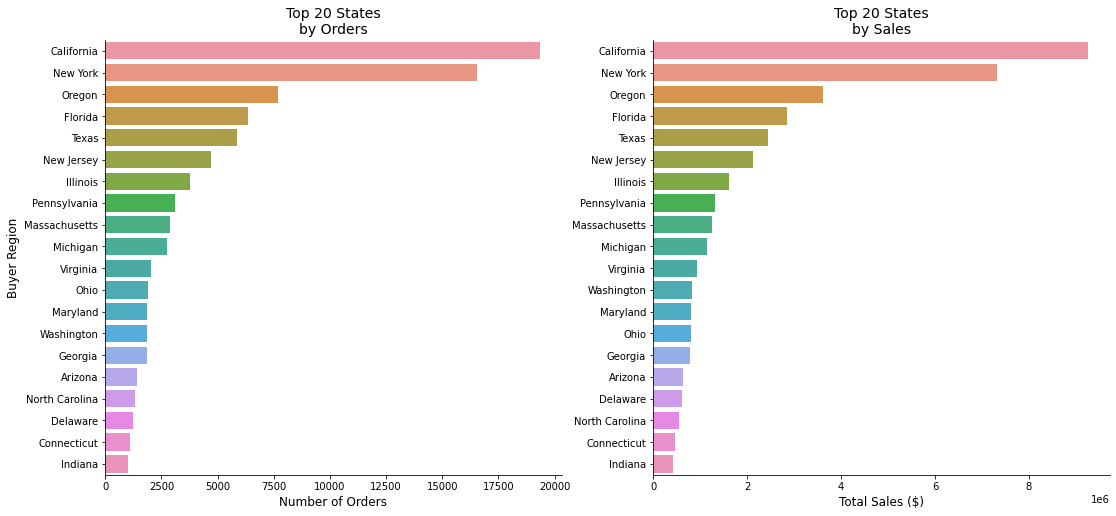

In [14]:
# count number of orders per state
orders = sneakers[['Buyer Region']].copy()
orders['Orders'] = 1
orders = (orders.groupby(['Buyer Region'], as_index=False).sum()
              .sort_values('Orders', ascending=False)
         )

# calculate sales per state
sales = (sneakers[['Buyer Region', 'Sale Price']].copy()
             .groupby(['Buyer Region'], as_index=False).sum() # sum the sales for each state
             .sort_values('Sale Price', ascending=False) # sort 
        )

fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
for ax in [ax1, ax2]:
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

sns.barplot(x='Orders', y='Buyer Region', data=orders.iloc[:20], orient='h', ax=ax1)

ax1.set_xlabel('Number of Orders', fontsize=12)
ax1.set_ylabel('Buyer Region', fontsize=12)
ax1.set_title('Top 20 States\nby Orders', fontsize=14)

ax2 = sns.barplot(x='Sale Price', y='Buyer Region', data=sales.iloc[:20], orient='h')
ax2.set_xlabel('Total Sales ($)', fontsize=12)
ax2.set_ylabel('')
ax2.set_title('Top 20 States\nby Sales', fontsize=14)

plt.show()

* StockX users in California and New York spent much more on Yeezy and Off-White shoes over the the course of 2 years compared to the rest of the states. This is most likely due to the popularity of "street fashion" in big cities like Los Angeles, San Francisco, and New York City. 

#### Average Sale Prices Per State

In [15]:
# merge 'sales' dataset with 'orders' dataset
regions = pd.merge(sales, orders, how='left', on='Buyer Region')

# calculate average sale price per order per state
regions['Avg. Sale'] = round(regions['Sale Price'] / regions['Orders'], 2)

# sort by descending Avg. Sale
regions = regions.sort_values('Avg. Sale', ascending=False)

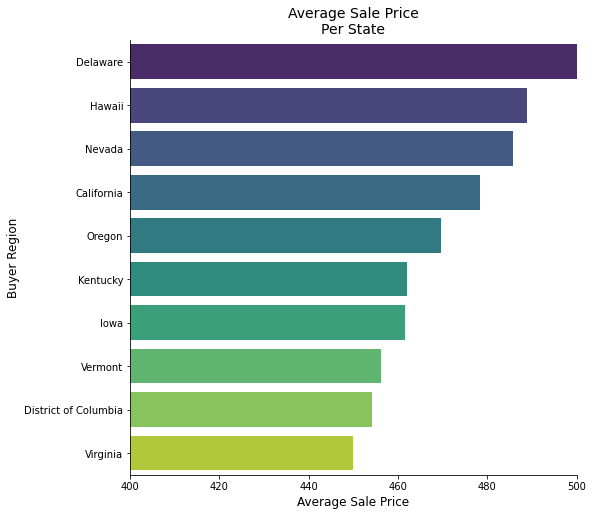

In [16]:
# plot top 10 highest Avg. Sale
fig, ax1 = plt.subplots(figsize=(8,8))
for spine in ['top', 'right']:
    ax1.spines[spine].set_visible(False)
    
ax1 = sns.barplot(x='Avg. Sale', y='Buyer Region', data=regions.iloc[:10], orient='h', palette='viridis', ax=ax1)
ax1.set_xlabel('Average Sale Price', fontsize=12)
ax1.set_ylabel('Buyer Region', fontsize=12)
ax1.set_title('Average Sale Price\nPer State', fontsize=14)
ax1.set_xlim(400,500)

plt.show()

* Although California had the most orders and the highest sales, it ranks 4th in average sale price per pair of shoes. New York doesn't even make the top ten here.
* StockX users in Delaware, Hawaii, and Nevada spend on average the most money for a pair of shoes.

### Is there a higher chance of making more money re-selling larger shoe sizes or smaller shoe sizes?

In [17]:
sneakers.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,ROI
0,2017-09-01,Yeezy,Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,877
1,2017-09-01,Yeezy,Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,465
2,2017-09-01,Yeezy,Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,470
3,2017-09-01,Yeezy,Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,855
4,2017-09-01,Yeezy,Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,608


In [18]:
# calculate ROI & count number of orders for each shoe size
shoe_sizes = sneakers[['Shoe Size', 'ROI']].copy()
shoe_sizes['Orders'] = 1
shoe_sizes = (shoe_sizes.groupby(['Shoe Size'], as_index=False).sum()
                  .sort_values('Shoe Size', ascending=False)
             )

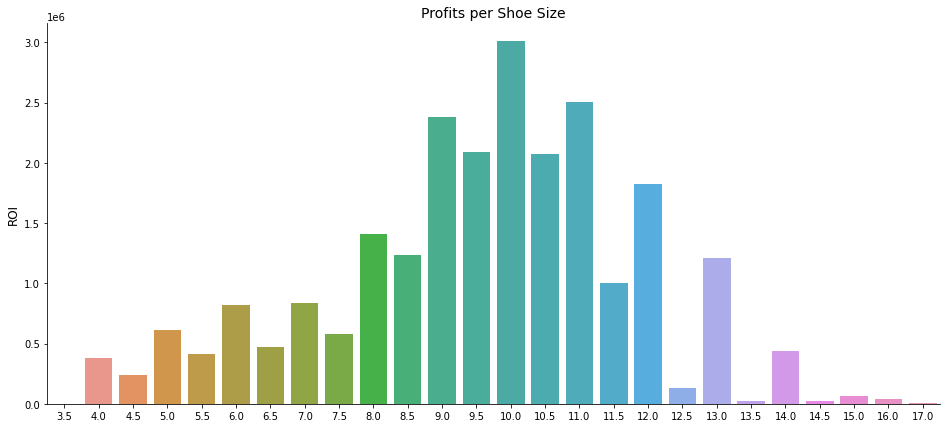

In [19]:
# plot ROI vs Shoe Size
fig, ax = plt.subplots(figsize=(16,7))

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
    
sns.barplot(x='Shoe Size', y='ROI', data=shoe_sizes, ax=ax)
ax.set_xlabel('')
ax.set_ylabel('ROI', fontsize=12)
ax.set_title('Profits per Shoe Size', fontsize=14)

plt.show()

* The highest selling shoe size is size 10, followed by size 11 and 9. (I'm a size 10, no wonder I can never get the shoes I want!)
* An interesting note: Half sizes sell slightly less than their neighboring full sizes (except for 11.5, 12.5, 13.5 and 14.5, which have significantly lower profits than their neighboring full sizes.
* Key takeaway: A seller will have a better chance of selling a pair of shoes if they are a size 9, 10 or 11, with size 10 giving them the best chances.

### What is the ROI on re-selling Yeezy shoes vs. Off-White x Nike?

In [20]:
sneakers.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,ROI
0,2017-09-01,Yeezy,Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,877
1,2017-09-01,Yeezy,Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,465
2,2017-09-01,Yeezy,Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,470
3,2017-09-01,Yeezy,Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,855
4,2017-09-01,Yeezy,Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,608


In [21]:
# calculate total ROI and number of orders per brand
brand_ROI = sneakers[['Brand', 'ROI']].copy()
brand_ROI['Orders'] = 1
brand_ROI = brand_ROI.groupby(['Brand'], as_index=False).sum()

# calculate average ROI per order
brand_ROI['Avg. ROI'] = round(brand_ROI['ROI'] / brand_ROI['Orders'], 2)

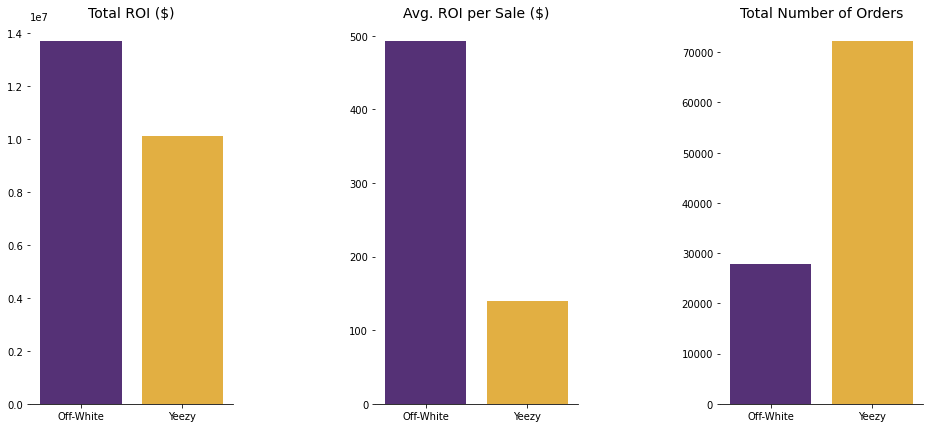

In [22]:
fig = plt.figure(figsize=(16, 7))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
        
# brand vs ROI
sns.barplot(x='Brand', y='ROI', data=brand_ROI, palette=lakers, ax=ax1)

# brand vs avg. ROI
sns.barplot(x='Brand', y='Avg. ROI', data=brand_ROI, palette=lakers, ax=ax2)

# brand vs orders
sns.barplot(x='Brand', y='Orders', data=brand_ROI, palette=lakers, ax=ax3)

for ax in [ax1, ax2, ax3]:
    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
ax1.set_title('Total ROI ($)', fontsize=14)
ax2.set_title('Avg. ROI per Sale ($)', fontsize=14)
ax3.set_title('Total Number of Orders', fontsize=14)

plt.subplots_adjust(wspace=0.7)
plt.show()

* The first plot shows that over this 2-year time period, StockX sellers in total made more money selling Off-White branded shoes. (Off-White totaled at around \\$14 million, while Yeezy totaled at around \\$10 million.)
* The second plot complements that fact by showing that the average ROI on a pair of Off-White shoes (\~\\$500) is over 3 times more than the average ROI on a pair of Yeezys (\~\\$150).
* The last plot, however, shows that a seller is over two times more likely to sell a pair of Yeezys (\~72,000 orders) than a pair of Off-White shoes (\~28,000 orders).

### Do these sneakers sell more during a certain time of the year?

In [23]:
# isolate 'Order Date', 'Brand', and 'ROI'
seasons = sneakers[['Order Date', 'Brand', 'ROI']].copy()

# extract year and month from 'Order Date'
seasons['Year'] = seasons['Order Date'].dt.year
seasons['Month'] = seasons['Order Date'].dt.month
seasons.drop(['Order Date'], axis=1, inplace=True)

# separate by year
year_2017 = seasons[seasons['Year'] == 2017].copy()
year_2018 = seasons[seasons['Year'] == 2018].copy()
year_2019 = seasons[seasons['Year'] == 2019].copy()

# drop 'Year' and 'Brand' and group by 'Month'
for year in [year_2017, year_2018, year_2019]:
    year.drop(['Year', 'Brand'], axis=1, inplace=True)
    year['Orders'] = 1

year_2017 = year_2017.groupby(['Month'], as_index=False).sum()
year_2018 = year_2018.groupby(['Month'], as_index=False).sum()
year_2019 = year_2019.groupby(['Month'], as_index=False).sum()

In [24]:
year_2017

,Month,ROI,Orders
0,9,421735,697
1,10,329487,610
2,11,1651439,4644
3,12,1629533,7342


In [25]:
year_2018

,Month,ROI,Orders
0,1,952821,3664
1,2,731003,2428
2,3,1030856,2745
3,4,992930,2756
4,5,1625627,3456
5,6,1676018,5431
6,7,1523297,7434
7,8,1942638,6090
8,9,975324,3974
9,10,1816159,6697


In [26]:
year_2019

,Month,ROI,Orders
0,1,1742155,10847
1,2,1278062,5346


Since the only complete year is 2018, it would be the only year that could show the differences in sales throughout the year.

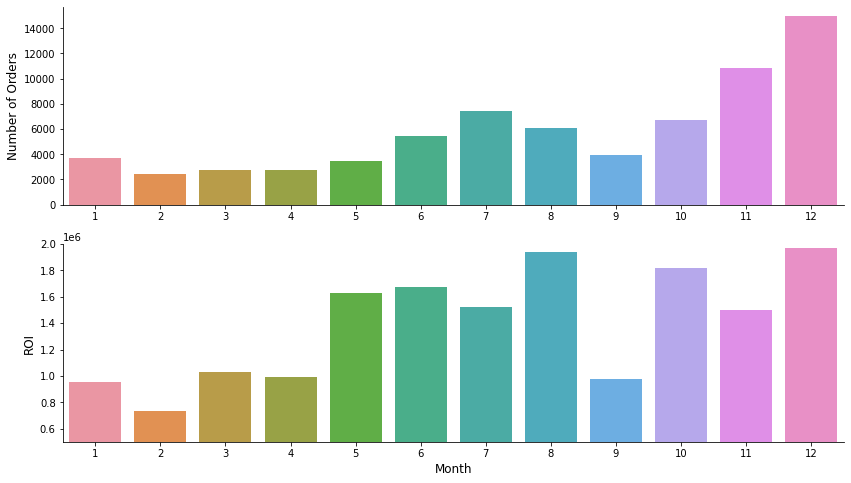

In [27]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
for ax in [ax1, ax2]:
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

# plot monthly number of orders
sns.barplot(x='Month', y='Orders', data=year_2018, ax=ax1)

# plot monthly ROI
sns.barplot(x='Month', y='ROI', data=year_2018, ax=ax2)

ax2.set_ylim(500000, 2000000)
ax1.set_xlabel('')
ax2.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Number of Orders', fontsize=12)
ax2.set_ylabel('ROI', fontsize=12)

plt.show()

* Although December has over twice as many transactions as in August, the ROI in these months are nearly the same. Furthermore, the number of transactions in August were less than that in October and November, yet sellers made more money in August.
* StockX sellers experienced higher ROI starting in May and up until the end of the year. The only exception was the significant drop in September, after which the ROI picked back up again.

#### Yeezy vs. Off-White ROI

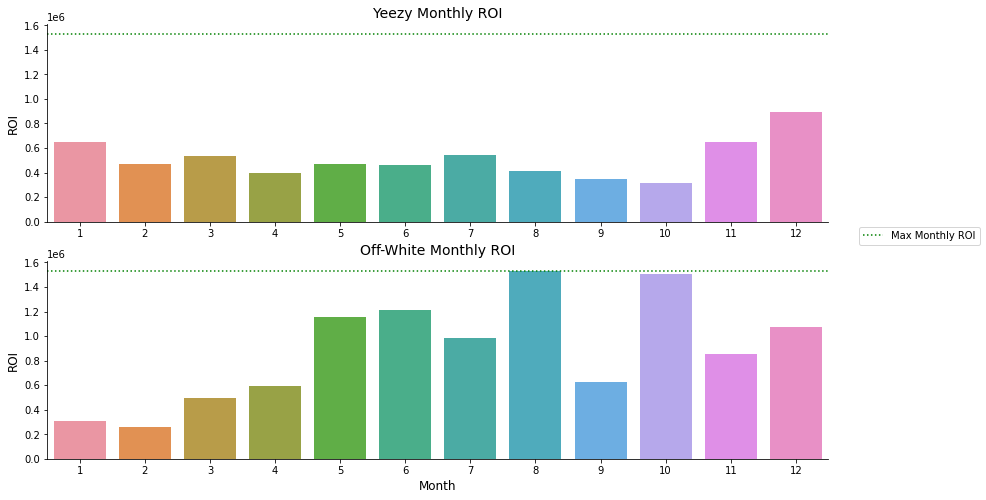

In [28]:
# isolate the brands in year 2018
yeezy_2018 = seasons[(seasons['Brand'] == 'Yeezy') & (seasons['Year'] == 2018)].copy()
offwhite_2018 = seasons[(seasons['Brand'] == 'Off-White') & (seasons['Year'] == 2018)].copy()

# drop Year and Brand column, add Orders column
for brand in [yeezy_2018, offwhite_2018]:
    brand.drop(['Year', 'Brand'], axis=1, inplace=True)
    brand['Orders'] = 1
    
# group by Month
yeezy_2018 = yeezy_2018.groupby(['Month'], as_index=False).sum()
offwhite_2018 = offwhite_2018.groupby(['Month'], as_index=False).sum()

# plot monthly ROI for each brand
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2, sharey=ax1)
for ax in [ax1, ax2]:
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

# yeezy
sns.barplot(x='Month', y='ROI', data=yeezy_2018, ax=ax1)
ax1.set_title('Yeezy Monthly ROI', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('ROI', fontsize=12)

# off-white
sns.barplot(x='Month', y='ROI', data=offwhite_2018, ax=ax2)
ax2.set_title('Off-White Monthly ROI', fontsize=14)
ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('ROI', fontsize=12)

ax1.axhline(y=1.53e6, ls=':', color='green')
ax2.axhline(y=1.53e6, ls=':', color='green', label='Max Monthly ROI')

plt.legend(bbox_to_anchor=(1.2,1.2))
plt.show()

* Off-White sneaker sellers have a better chance of achieving a high monthly ROI throughout the second half of the year, however Yeezy sellers experience a more consistent monthly ROI.

### Are Yeezy and Off-White sale increasing or decreasing?

In [29]:
sneakers.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,ROI
0,2017-09-01,Yeezy,Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,877
1,2017-09-01,Yeezy,Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,465
2,2017-09-01,Yeezy,Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,470
3,2017-09-01,Yeezy,Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,855
4,2017-09-01,Yeezy,Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,608


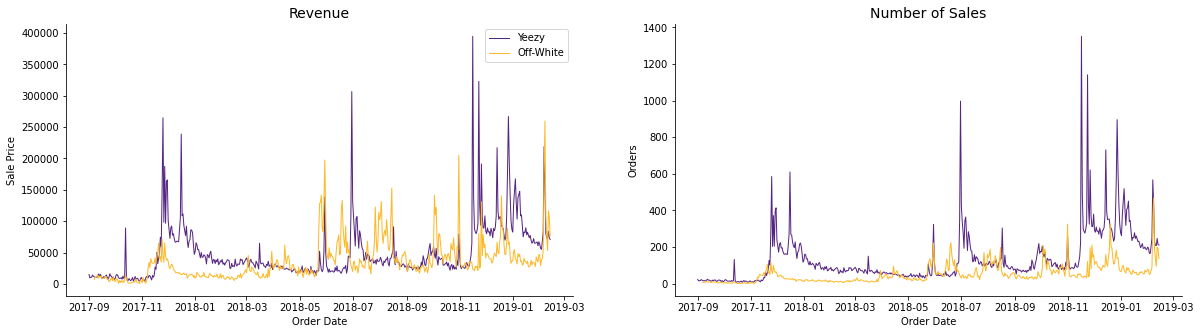

In [30]:
# isolate Order Date and Sales by Brand
# yeezy 
yeezy_sales = sneakers[sneakers['Brand'] == 'Yeezy'][['Order Date', 'Sale Price']].copy()
yeezy_sales['Orders'] = 1
yeezy_sales = yeezy_sales.groupby(['Order Date'], as_index=False).sum()

# off-white
offwhite_sales = sneakers[sneakers['Brand'] == 'Off-White'][['Order Date', 'Sale Price']].copy()
offwhite_sales['Orders'] = 1
offwhite_sales = offwhite_sales.groupby(['Order Date'], as_index=False).sum()

fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
for ax in [ax1, ax2]:
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

ax1.set_title('Revenue', fontsize=14)
ax2.set_title('Number of Sales', fontsize=14)

# plot Sale Price vs Order Date on ax1
sns.lineplot(x='Order Date', y='Sale Price', data=yeezy_sales, color=purple, lw=1, ax=ax1, label='Yeezy')
sns.lineplot(x='Order Date', y='Sale Price', data=offwhite_sales, color=gold, lw=1, ax=ax1, label='Off-White')

# plot Orders vs Order Date on ax2
sns.lineplot(x='Order Date', y='Orders', data=yeezy_sales, color=purple, lw=1, ax=ax2)
sns.lineplot(x='Order Date', y='Orders', data=offwhite_sales, color=gold, lw=1, ax=ax2)


plt.show()

* The Yeezy sales tend to repeat a pattern of large spikes with a subsequent downward trend, but the data shows no indication that Yeezy sales are increasing or decreasing overall.
* Off-White shoe sales follow a similar pattern of spikes and dips, but the data also does not show any indication that Off-White sales are increasing or decreasing overall.
* The spikes most likely appear when the brands drop a new shoe collection or restock a highly in-demand shoe.
* The spikes all appear in the latter half of the year. This pattern could be useful to people who decide to create a business out of re-selling shoes.

## Results and Conclusions
__Are customers in certain regions more likely to spend more on sneakers?__  
StockX users in California and New York spent the most money on either Yeezy or Off-White branded shoes over the course of 2 years, about \\$9.2 million and \\$7.3 million, respectively. The state with the next highest sales is Oregon, with users there spending about \\$3.6 million over 2 years. The remainder of the states spent less than \\$3 million on Yeezy and Off-White shoes. The median amount of money spent on these shoes is only around \\$280,000, which pales in comparison to the \\$9.2 million users in California spent.

__Is there a higher chance of making money re-selling larger shoe sizes or smaller shoe sizes?__  
Size 10 shoes were a clear winner in terms of number of pairs sold and ROI. The next top selling shoe sizes were size 11 and size 9, with size 11 shoes selling just slightly more than size 9 shoes. In terms of sales for half-sizes and full-sizes, full-sizes consistently sold more than their neighboring half-sizes.

__What is the ROI on re-selling Yeezy shoes vs. Off-White x Nike?__  
In total, re-selling Off-White shoes earned about \\$4 million more in ROI than Yeezys. The average ROI per pair of Off-White shoes was almost \\$500, compared to the average ROI of about \\$140 for Yeezys. Although selling Off-White shoes provided a much higher ROI, sellers had a much higher chance of actually selling a pair of Yeezys. Of the almost 100,000 pairs of shoes sold in the data, over 70,000 were Yeezys&mdash;in other words, a user had over a 70\% chance of successfully selling a pair of Yeezys and less than 30\% chance of selling an Off-White pair.

__Do these sneakers sell more during a certain time of the year?__  
In the year 2018, for most of the year the number of sales remained below 7,000 sales per month, with most lingering around 3,000 to 4,000 sales per month. The data then showed a sudden increase in sales in November and December of that same year, about 10,000 and 15,000 sales, respectively. The increase in sales is most likely due to the holiday season celebrated in November and December. In terms of ROI, however, the monthly ROI was relatively high from May until December, with the exception of September. Upon further investigation, the high monthly ROIs were heavily influenced by Off-White sales, which we've previously found to have a premium price tag.

__Are Yeezy and Off-White sales increasing or decreasing?__  
The data showed no clear trend that indicated increasing or decreasing sales. The data did show that sales experienced large spikes, most likely coinciding with the brands releasing a new shoe collection, followed by long periods of low sales.

The results above can potentially help companies or independent sellers improve their sales performance. For instance, a shoe company that finds out that California and New York are the top two states in the sneaker market could choose to spend more of their advertising budget in those two states and less of it in, say, Wyoming. Or, independent re-sellers, who only stock up on rare shoes just a few times a year, could maximize their profits by focusing their selections on the most in-demand shoe sizes and the shoe brands that are almost guaranteed to re-sell quickly. These are just a few of the practical uses of data analysis in the sneaker market. Although this analysis is focused on Yeezy and Off-White sneaker sales, it can be expanded reflect the sales performances of a variety of brands and clothing items.